[SF-DST] Booking reviews

Описание:
Представьте, что вы работаете датасаентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов нахождения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель играет нечестно, и его стоит проверить. Вам поставлена задача создать такую модель.

Описание:
Представьте, что вы работаете датасаентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов нахождения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель играет нечестно, и его стоит проверить. Вам поставлена задача создать такую модель.

##### Подготовка рабочего пространства

import pandas as pd
import numpy as np

DATA_DIR = '/content/'
df_train = pd.read_csv(DATA_DIR+'hotels_train.csv')               # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv')                 # датасет для предсказания
#sample_submission = pd.read_csv(DATA_DIR+'/submission.csv')      # самбмишн Сабмишн (англ. submission) — это победа в поединке по единоборствам,

In [1]:
import pandas as pd
import numpy as np
# DATA_DIR = '/content/'
df_train = pd.read_csv('hotels_train1.csv')               # датасет для обучения
df_test = pd.read_csv('hotels_test1.csv')                 # датасет для предсказания
#sample_submission = pd.read_csv(DATA_DIR+'/submission.csv')      # самбмишн

Столбец с названием reviewer_score обычно представляет собой числовой показатель оценки, выставленной рецензентом (например, оценка фильма, продукта, услуги и т.п.). Это может быть рейтинг или балл, отражающий мнение или качество с точки зрения обозревателя.
В зависимости от контекста данных reviewer_score может содержать:
Числовые значения (например, от 0 до 10 или 0 до 100),
Баллы или оценки, выставленные человеком или системой,
Количественную меру качества или удовлетворённости.
Часто такой столбец используется для анализа или фильтрации данных по значению оценки.
Если речь о конкретном DataFrame или наборе данных, reviewer_score — это колонка с числовыми оценками или рейтингами, которые можно использовать для аналитики, сортировки, вычисления средних значений и других статистических операций

In [2]:
# В pandas метод sample() используется для получения случайной выборки из строк DataFrame.
# Это означает, что с помощью sample() можно:
# Выбрать случайное количество строк (например, 5 случайных строк).
# Выбрать случайную часть DataFrame, указав долю (например, 10% строк).
# Перемешать строки всего DataFrame, если взять frac=1 (100% строк в случайном порядке).
# Пример использования:
# df.sample(n=5)       # 5 случайных строк из df
# df.sample(frac=0.1)  # 10% строк случайно из df
# df.sample(frac=1)    # перемешать все строки df
df_train['sample'] = 1           # помечаем где у нас трейн
df_test['sample'] = 0            # помечаем где у нас тест
df_test['reviewer_score'] = 0    # в тесте у нас нет значения reviewer_score, мы его должны предсказать, поэтому пока просто заполняем нулями ( reviewer_score обычно представляет собой числовой показатель оценки)
reviews_df = pd.concat([df_test, df_train], ignore_index=True, sort=False)
# reviews_df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем train Для объединения df_test и df_train с помощью pd.concat() вместо устаревшего append()
# Объяснение изменений:
# pd.concat() принимает список DataFrame для объединения.
# Параметр ignore_index=True сбрасывает индексы в итоговом DataFrame.
# Параметр sort=False предотвращает автоматическую сортировку столбцов, оставляя порядок неизменным.
# Таким образом, код с concat() полностью заменит строку с append() и reset_index() за один вызов.

df = df.append(new_row, ignore_index=True) 
Ошибка 'DataFrame' object has no attribute 'append' возникает потому, что метод append() для объектов pandas DataFrame был устаревшим начиная с версии 1.4.0, а в версии Pandas 2.0 был полностью удалён. Этот метод раньше использовался для добавления строк к DataFrame, но теперь он больше не поддерживается.
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
Таким образом, ошибка означает, что версия Pandas современная (2.0 и новее), где метода append() уже нет, и нужно заменить этот вызов на concat() для правильного добавления строк или объединения DataFrame.

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [4]:
# объединяем положительные и отрицательные отзывы
reviews_df["review"] = reviews_df["negative_review"] + reviews_df["positive_review"]
# создаём метку для плохого отзыва (1 - True, 0 - False)
reviews_df["is_bad_review"] = reviews_df["reviewer_score"].apply(lambda x: 1 if x < 5 else 0)
# выбираем только релевантные столбцы
reviews_df = reviews_df[["review", "is_bad_review", "reviewer_score", "sample"]]
reviews_df.head()

,review,is_bad_review,reviewer_score,sample
0,Would have appreciated a shop in the hotel th...,1,0.0,0
1,No tissue paper box was present at the roomNo...,1,0.0,0
2,Pillows Nice welcoming and service,1,0.0,0
3,No Negative Everything including the nice upgr...,1,0.0,0
4,No Negative Lovely hotel v welcoming staff,1,0.0,0


##### Sample данные

In [5]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [6]:
# удалим 'No Negative' или 'No Positive' из текста
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

- import nltk — это команда в Python, которая импортирует библиотеку NLTK (Natural Language Toolkit).
NLTK — одна из самых популярных и мощных библиотек для обработки естественного языка (Natural Language Processing, NLP) в Python. Она предоставляет множество инструментов и ресурсов для работы с текстом: токенизацию, стемминг, лемматизацию, разметку частей речи, синтаксический разбор, корпуса и словари, а также алгоритмы для анализа текста и машинного обучения.
Эту библиотеку используют, когда надо анализировать, обрабатывать и понимать человеческий язык в программных приложениях, например, для создания чат-ботов, анализа тональности отзывов, автоматического перевода и других задач NLP.

- from nltk.corpus import wordnet означает импорт из библиотеки NLTK модуля WordNet.
  
- nltk.corpus — это модуль библиотеки NLTK, который предоставляет доступ к разнообразным текстовым корпусам и словарным ресурсам для обработки естественного языка (NLP) в Python.
  
- WordNet — это большая лексическая база данных английского языка, представляющая собой своего рода электронный словарь и тезаурус. В ней слова объединены в синонимические группы (синсеты), каждая из которых имеет определение, примеры употребления, а также связи с другими словами (синонимы, антонимы и другие отношения).
NLTK предоставляет удобный интерфейс для работы с WordNet: можно получать определения слов, списки синонимов, примеры использования, искать антонимы, строить семантические сети и проводить другие лингвистические анализы.

- Лемматизация — это процесс приведения слова к его базовой, начальной форме, называемой леммой. Например, слова "бежал", "бегу" и "бежать" после лемматизации превратятся в одну лемму — "бежать". Этот метод используется в обработке естественного языка (NLP) и поисковых системах для того, чтобы компьютер мог "понимать" разные грамматические формы одного слова как единое целое, что повышает точность анализа текста. 

In [7]:
# https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/
# использование wordnet для анализа частей речи

import nltk
from nltk.corpus import wordnet

nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
# используется для загрузки в библиотеку NLTK предобученной модели для частеречной разметки текста — POS-теггера (Part-of-Speech tagger), 
# основанного на алгоритме усреднённого персептрона (averaged perceptron).

nltk.download('wordnet')
# означает загрузку в NLTK лексической базы данных WordNet.

nltk.download('stopwords')
# загружает в NLTK набор списков стоп-слов для разных языков.
# Стоп-слова — это часто встречающиеся в языке слова (например, предлоги, союзы, частицы: «и», «в», «не», «что»), 
# которые обычно не несут важной смысловой нагрузки и часто удаляются из текста при его обработке и анализе.
# NLTK не включает эти списки автоматически, поэтому их нужно скачать отдельно с помощью nltk.download('stopwords').

def get_wordnet_pos(pos_tag):
# Функция get_wordnet_pos(pos_tag) обычно используется в связке с библиотекой NLTK для корректной лемматизации слов с учётом их части речи (POS — Part Of Speech).
# Что делает эта функция:
# Принимает POS-тег в формате Penn Treebank (формат, который выдаёт функция nltk.pos_tag),
# Преобразует этот тег к формату POS-тегов, который ожидает лемматизатор WordNet из NLTK (wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV),
# Если тег не подходит под известные категории, возвращает wordnet.NOUN по умолчанию.
    
    if pos_tag.startswith('J'):
# означает проверку, начинается ли строка pos_tag с буквы 'J'.
# В контексте NLTK и POS-тегов (частей речи) это важно, потому что теги POS имеют формат Penn Treebank, где:
# Теги, начинающиеся с "J" обозначают прилагательные (adjectives).
# Например, "JJ" — прилагательное, "JJR" — прилагательное в сравнительной степени, "JJS" — прилагательное в превосходной степени.
# Поэтому эта проверка используется, чтобы определить, относится ли тег к прилагательным.
        
        return wordnet.ADJ
# это возвращение из функции значения wordnet.ADJ, означающего часть речи прилагательное (adjective) в формате, который понимает лемматизатор WordNet из библиотеки NLTK.
# В NLTK для лемматизации нужной является информация о части речи слова (POS). wordnet.ADJ — специальная константа, указывающая, что слово является прилагательным. 
# Это помогает лемматизатору правильно найти базовую форму слова с учётом его грамматической категории.
    
    elif pos_tag.startswith('V'):
# проверяет, начинается ли POS-тег (часть речи), заданный в формате Penn Treebank, с буквы "V".
# В системе тегов Penn Treebank все теги, начинающиеся на "V", обозначают глаголы.
# Примеры таких тегов:
# VB — глагол в базовой форме (например, "run"),
# VBD — глагол в прошедшем времени ("ran"),
# VBG — герундий или причастие настоящего времени ("running"),
# VBN — причастие прошедшего времени ("run"),
# VBP — глагол в настоящем времени (не третье лицо, "run"),
# VBZ — глагол в настоящем времени третьего лица единственного числа ("runs").
# Поэтому эта проверка используется для определения, что слово в предложении является глаголом, что позволяет, например, 
# корректно сопоставить тег с соответствующей частью речи для лемматизации или другой обработки языка.
        
        return wordnet.VERB
# это возвращение из функции значения wordnet.VERB, которое обозначает часть речи глагол (verb) в формате, который понимает лемматизатор WordNet из библиотеки NLTK.
# Это необходимо для лемматизации, при которой важно знать, к какой части речи относится слово, чтобы правильно привести его к базовой форме. wordnet.VERB указывает, 
# что слово является глаголом.

    elif pos_tag.startswith('N'):
# проверяет, начинается ли POS-тег, заданный в формате Penn Treebank, с буквы "N".
# В системе тегов Penn Treebank теги, начинающиеся с "N", обозначают существительные (nouns).
# Примеры таких тегов:
# NN — существительное в единственном числе (например, "cat"),
# NNS — существительное во множественном числе (например, "cats"),
# NNP — собственное имя (например, "John"),
# NNPS — собственные имена во множественном числе.
# Таким образом, эта проверка используется, чтобы определить, что часть речи слова является существительным, что важно, например, 
# для правильной обработки слова в лемматизации или синтаксическом разборе

        return wordnet.NOUN
# это возвращение из функции специального обозначения части речи существительное (noun) в формате, используемом WordNet из библиотеки NLTK.
# В контексте лемматизации WordNet требует указания части речи слова, чтобы правильно привести его к базовой форме. 
# wordnet.NOUN — это внутренний код, который обозначает, что слово является существительным.

    elif pos_tag.startswith('R'):
# проверяет, начинается ли POS-тег в формате Penn Treebank с буквы "R".
# В системе тегов Penn Treebank теги, начинающиеся с "R", обозначают наречия (adverbs).
# Примеры таких тегов:
# RB — наречие (например, "quickly"),
# RBR — сравнительная степень наречия (например, "faster"),
# RBS — превосходная степень наречия (например, "fastest").
# Таким образом, эта проверка нужна, чтобы определить, что часть речи слова — наречие, что важно для правильной лингвистической обработки, например, для лемматизации.

        return wordnet.ADV
# это возврат из функции значения wordnet.ADV, которое обозначает часть речи наречие (adverb) в формате, используемом лемматизатором WordNet библиотеки NLTK.
# В процессе лемматизации важно указывать часть речи слова для правильного нахождения базовой формы. wordnet.ADV указывает, что слово — это наречие.

    else:
        return wordnet.NOUN
# это возвращение из функции специальной константы wordnet.NOUN, которая обозначает часть речи существительное (noun) в формате, понятном лемматизатору WordNet из библиотеки NLTK.
# Это нужно для правильной лемматизации слов с учётом их категории. Указание, что слово — существительное, помогает алгоритму привести слово к базовой, словарной форме корректно.

import string
# импортирует встроенный в Python модуль string, который предоставляет удобные константы и функции для работы со строками.
# Модуль string содержит, например:
# Константы с предопределёнными наборами символов: ascii_letters (латинские буквы), digits (цифры), punctuation (знаки пунктуации) и др.
# Полезные функции для обработки строк, например, capwords() — для капитализации первой буквы каждого слова.
# Классы для форматирования и шаблонов, например Formatter и Template.
# Этот модуль часто используется для упрощения операций с текстом, например, проверки, какие символы есть в строке, форматирования сообщений, создания шаблонов для подстановки значений.
    
from nltk import pos_tag
# означает импорт функции pos_tag из библиотеки NLTK.
# Функция pos_tag используется для автоматической разметки текста, то есть для присвоения каждому слову в предложении его части речи (POS — Part Of Speech), 
# например, существительное, глагол, прилагательное и т.д.
# Процесс называется POS-тегингом (тегированием частей речи) и позволяет анализировать грамматическую структуру текста.

from nltk.corpus import stopwords
# означает импорт в программу набора списков стоп-слов из корпуса NLTK.
# Стоп-слова — это часто встречающиеся слова в языке (например, предлоги, союзы, частицы: «и», «в», «не», «что»), которые обычно не несут смысла и могут удаляться из текста при обработке для уменьшения шума.
# NLTK содержит готовые списки стоп-слов для разных языков, например, для русского, английского и других.
# Импортируя stopwords, можно получить эти списки и использовать для фильтрации текста

from nltk.tokenize import WhitespaceTokenizer
# означает импорт класса WhitespaceTokenizer из библиотеки NLTK.
# WhitespaceTokenizer — это простой токенизатор, который разбивает текст на токены (слова) по пробельным символам. Он разделяет текст на слова, используя пробелы, табуляции, 
# переводы строк и другие символы пробела как разделители.
# В отличие от более сложных токенизаторов, он не учитывает знаки препинания и другие символы, просто разбивает текст по пробелам. Это делает его быстрым, но менее точным для сложного анализа.

from nltk.stem import WordNetLemmatizer
# означает импорт класса WordNetLemmatizer из библиотеки NLTK.
# WordNetLemmatizer — это инструмент для лемматизации слов на английском языке. Лемматизация — это процесс приведения слова к его базовой или словарной форме (лемме) с учётом его части речи и контекста.
# В отличие от стемминга, который просто обрезает окончания слов, лемматизация учитывает грамматические и смысловые особенности слова, поэтому результат точнее.
# Например, слова "studies" и "studying" будут приведены к форме "study".

def clean_text(text):
# это объявление функции с именем clean_text, которая принимает один аргумент text. Обычно такая функция предназначена для очистки или предобработки текста.
# Функция очистки текста может выполнять следующие задачи:
# удаление лишних пробелов в начале и конце строки,
# удаление или замена специальных символов и знаков препинания,
# удаление стоп-слов,
# нормализация регистра (например, преобразование всего текста к нижнему регистру),
# удаление чисел, HTML-тегов, или других посторонних элементов,
# замена сокращений,
# и другие операции, упрощающие последующий анализ текста.
    
# приводим к нижнему регистру
    text = text.lower()
    
# разделение текста на слова и удаление знаков препинания
    text = [word.strip(string.punctuation) for word in text.split(" ")]
# означает следующее:
# text.split(" ") разбивает строку text на список слов, разделяя по пробелам.
# Для каждого слова из этого списка (for word in ...) выполняется операция word.strip(string.punctuation).
# Метод strip(string.punctuation) удаляет все знаки пунктуации (например, запятые, точки, восклицательные знаки и т.п.) с начала и конца слова.
# Результатом работы будет новый список слов без ведущих и завершающих знаков пунктуации.
# То есть, эта строка кода реализует очистку текста от пунктуации, разбивая текст на слова и очищая каждое слово от начальных и конечных знаков препинания.
    
# удаляем цифры из текста
    text = [word for word in text if not any(c.isdigit() for c in word)]
# делает следующее:
# Итерация по каждому слову в списке text.
# Для каждого слова проверяется условие: если в слове нет ни одной цифры (not any(c.isdigit() for c in word)).
# Вложенный генератор any(c.isdigit() for c in word) проверяет каждый символ слова word и возвращает True, если хотя бы один символ — цифра.
# Если условие истинно (то есть цифр в слове нет), слово добавляется в новый список.
# В итоге text становится списком слов без чисел.
# Это фильтрация списка слов, удаляющая все слова, которые содержат цифры.
    
# удаляем стоп-слова
    stop = stopwords.words('english')
# означает создание списка stop, который содержит предопределённый набор стоп-слов английского языка из библиотеки NLTK.
# Стоп-слова — это часто используемые слова (например, артикли, предлоги, союзы: "the", "is", "in", "and"), которые обычно не несут важной смысловой нагрузки 
# при анализе текста и часто удаляются для улучшения качества и эффективности обработки.
# Команда stopwords.words('english') загружает список таких слов на английском языке, предопределённый в NLTK.
# Этот список используется для фильтрации текста — исключения часто встречающихся, но малоинформативных слов из анализа, например, при классификации, 
# тематическом моделировании или анализе тональности.
    text = [x for x in text if x not in stop]
# означает создание нового списка из элементов списка text, при этом фильтруются все слова, которые содержатся в списке стоп-слов stop.
# То есть, из текста удаляются все слова, которые являются стоп-словами (например, предлоги, артикли, союзы), чтобы очистить текст от часто встречающихся и малоинформативных слов.
    
# удаляем пустые токены
    text = [t for t in text if len(t) > 0]
# означает создание нового списка, включающего только те элементы из списка text, у которых длина больше нуля.
# Проще говоря, это удаление из списка всех пустых строк или пустых элементов.
# Такой приём часто используется при предобработке текста для удаления пустых слов (пустых строк), которые могут появляться после разбиения текста или очистки.
    
# pos tag text
    pos_tags = pos_tag(text)
# означает вызов функции pos_tag из библиотеки NLTK для разметки списка слов text частями речи.
# Функция pos_tag принимает на вход последовательность токенов (слов) и возвращает список кортежей, где каждому слову сопоставлен его POS-тег (часть речи) согласно стандарту, например, Penn Treebank.
# Это позволяет понять грамматическую роль каждого слова в тексте — существительное, глагол, прилагательное, наречие и другие.
    
# лемматизация текста
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
# делает лемматизацию слов из списка pos_tags.
# Разбор компонентов:
# pos_tags — это список кортежей (слово, POS-тег) из функции pos_tag.
# t — само слово.
# t — POS-тег слова (например, 'NN', 'VB' и т.д.).
# get_wordnet_pos(t) — функция, которая преобразует POS-тег из формата Penn Treebank в формат, который понимает WordNet (например, 'N' для существительных, 'V' — для глаголов).
# WordNetLemmatizer().lemmatize(word, pos) — метод, который преобразует слово к базовой форме ("лемме") с учётом части речи.
# Итоговый список содержит лемматизированные формы всех слов.
# Таким образом, эта конструкция выполняет лемматизацию текста, учитывая грамматическую роль каждого слова, что делает нормализацию точнее и полезнее для последующего анализа

# удаляем слова из одной буквы
    text = [t for t in text if len(t) > 1]
# означает создание нового списка, который содержит только те элементы из списка text, длина которых больше 1.
# Другими словами, из списка удаляются все слова или элементы, состоящие из одного символа или пустые.
# Это часто используется в предобработке текста, чтобы отфильтровать слишком короткие слова, которые обычно малоинформативны.
    
# объединяем текст
    text = " ".join(text)
# означает объединение элементов списка text в одну строку, где элементы разделены пробелом.
# Метод join вызывается на строке-разделителе (в данном случае это пробел " "), а в качестве аргумента принимает список строк. Он создаёт новую строку, 
# в которой все элементы из списка соединены указанным разделителем.
    
    return(text)
# в Python используется внутри функции для возврата значения text обратно в вызывающий код.
# Оператор return завершает выполнение функции и передает указанное за ним значение (в данном случае text) туда, откуда была вызвана функция. 
# Это позволяет использовать результат вычислений функции в дальнейшем в программе.

# очистка текстовых данных
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Станислав\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Станислав\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Станислав\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Станислав\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# nltk.download()

##### Создание новых признаков

In [8]:
# https://habr.com/ru/company/Voximplant/blog/446738/
# анализ тональности (настроения) текста отзыва

from nltk.sentiment.vader import SentimentIntensityAnalyzer
# это класс из библиотеки NLTK (Natural Language Toolkit), предназначенный для анализа эмоциональной окраски текста (sentiment analysis).
# SentimentIntensityAnalyzer использует модель VADER (Valence Aware Dictionary and sEntiment Reasoner), которая представляет собой предобученный лексический
# и правило-ориентированный инструмент для оценки настроения, особенно эффективный для текста из социальных сетей.
# Основные функции SentimentIntensityAnalyzer:
# - Получение оценки настроения текста как набора числовых значений, включая положительную, отрицательную, нейтральную и общую (compound) оценку.
# - Оценка учитывает не только отдельные слова, но и контекст, интонацию (например, заглавные буквы, восклицательные знаки), усиливающие или ослабляющие эмоциональную окраску слова.

nltk.download('vader_lexicon')
# в Python используется для загрузки лексического словаря VADER, который необходим для работы анализатора тональности SentimentIntensityAnalyzer из библиотеки NLTK.
# Что это значит:
# - VADER (Valence Aware Dictionary and sEntiment Reasoner) — это предобученный словарь и набор правил для оценки эмоциональной окраски текста.
# - Словарь содержит слова и фразы с заранее присвоенными оценками эмоциональной тональности (позитивной, негативной и нейтральной) и их степенью.
# - Этот словарь не входит в базовую установку библиотеки NLTK, поэтому его нужно загружать отдельно с помощью nltk.download('vader_lexicon').
# - После загрузки лексикона SentimentIntensityAnalyzer может использовать эти данные для оценки настроения текста.
# - Таким образом, данная команда обеспечивает загрузку необходимых данных для успешного выполнения анализа настроения с помощью VADER в NLTK.

sid = SentimentIntensityAnalyzer()
# это создание экземпляра (объекта) класса SentimentIntensityAnalyzer из библиотеки NLTK.
# Что это значит:
# - SentimentIntensityAnalyzer — это класс для анализа тональности текста (sentiment analysis) с помощью модели VADER.
# - Вызов SentimentIntensityAnalyzer() и присвоение результата переменной sid инициализирует этот анализатор, готовый к работе.
# - После этого с помощью sid можно вызывать методы для оценки настроения текстов, например sid.polarity_scores(text).
# - Метод polarity_scores(text) возвращает словарь с оценками тональности: положительная, отрицательная, нейтральная и общая (compound) оценка.

reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
# означает следующее:
# - reviews_df — это объект DataFrame из библиотеки pandas, который содержит столбец "review" с текстами отзывов.
# - Метод .apply() применяет указанную функцию к каждому элементу столбца "review".
# - lambda x: sid.polarity_scores(x) — это анонимная функция, которая для каждого отзыва x вызывает метод polarity_scores объекта sid (экземпляр SentimentIntensityAnalyzer) 
# - для получения оценки настроения текста.
# - В итоге создаётся новый столбец "sentiments", в который записываются результаты анализа настроения (словарь с оценками позитивного, негативного, нейтрального и общей тональности) для каждого отзыва.
# Проще говоря, этот код анализирует по одному каждому отзыву из столбца "review" и сохраняет результаты анализа в новый столбец "sentiments" таблицы reviews_df.

reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)
# означает следующее:
# - В столбце reviews_df["sentiments"] содержатся словари (полученные, например, с помощью sid.polarity_scores).
# - reviews_df['sentiments'].apply(pd.Series) преобразует каждый словарь из столбца "sentiments" в отдельные столбцы DataFrame (то есть распаковывает ключи словаря как имена новых столбцов, 
# а значения как данные).
# - reviews_df.drop(['sentiments'], axis=1) удаляет исходный столбец "sentiments", так как он теперь замещён развернутыми колонками.
# - pd.concat([...], axis=1) объединяет два DataFrame по колонкам: исходный без столбца "sentiments" и развернутые столбцы с детализацией настроений.
# - В результате reviews_df обновляется так, что вместо столбца со словарями теперь есть несколько столбцов с числовыми значениями тональности (например, positive, negative, neutral, compound).
# Иными словами, этот код превращает столбец с вложенными структурами (словарями) в несколько отдельных колонок с оценками настроения для удобного анализа и работы с ними.Выражение

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Станислав\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# создадим признак кол-во символов в отзыве
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))
# значает следующее:
# - В DataFrame reviews_df есть столбец "review", содержащий текст отзывов.
# - Метод .apply(lambda x: len(x)) применяет к каждому элементу этого столбца (каждому отзыву) функцию, которая возвращает длину строки x (то есть количество символов в отзыве).
# - Результаты — количество символов в каждом отзыве — записываются в новый столбец "nb_chars".
# Проще говоря, этот код создаёт новый столбец, где для каждого отзыва указано, сколько в нём символов всего, включая пробелы и знаки препинания

# создадим признак кол-во слов в отзыве
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))
# означает следующее:
# - В столбце "review" DataFrame reviews_df хранятся текстовые отзывы.
# - Для каждого отзыва применяется функция lambda x: len(x.split(" ")), которая сначала разбивает текст строки x на слова с помощью метода .split(" ").
# - Метод .split(" ") разделяет строку по пробелу, создавая список слов.
# - len(...) возвращает количество элементов в этом списке, то есть количество слов в отзыве.
# - Полученное число слов записывается в новый столбец "nb_words".
# Иными словами, этот код создаёт новый столбец с подсчётом количества слов в каждом отзыве из столбца "review".

In [10]:
# https://habr.com/ru/post/585838/
# векторизация слов с помощью doc2vec и создание нового признака

from gensim.test.utils import common_texts
# Что это такое:
# - common_texts — это небольшой игрушечный корпус (корпус тестовых текстов), который содержит примеры документов в виде списков слов.
# - Этот набор обычно используется для демонстрации, отладки и тестирования моделей Gensim, например, для обучения моделей Word2Vec или FastText.
# - Пример содержимого common_texts: [['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ...].
# - Он удобен, чтобы быстро проверить работу различных модулей Gensim без необходимости загружать большие реальные корпуса.
# Именно поэтому часто в руководствах и примерах для Gensim можно встретить использование common_texts как доступных "демо" данных.

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# Что это такое:
# - Doc2Vec — это модель, аналогичная Word2Vec, но создающая векторные представления (эмбеддинги) не только для слов, но и для целых документов (текстов). 
# Это позволяет использовать векторные представления для задач классификации, поиска и анализа документов.
# - TaggedDocument — это структура данных, представляющая один документ, который включает список слов и один или несколько тегов (уникальных идентификаторов этого документа).
# Теги необходимы для того, чтобы модель могла отличать разные документы при обучении.
# Обычно для обучения Doc2Vec подготавливают корпус документов в виде набора объектов TaggedDocument, где каждый документ размечен уникальным тегом:

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]
# означает:
# - Создаётся список documents, который будет содержать экземпляры класса TaggedDocument из библиотеки Gensim.
# - reviews_df["review_clean"] — столбец DataFrame с уже предобработанными текстами отзывов (строками).
# - Метод .apply(lambda x: x.split(" ")) для каждого отзыва разбивает строку на список слов (токенов).
# - enumerate(...) нумерует эти списки, давая каждой записи уникальный индекс i.
# - Для каждого списка слов doc создаётся объект TaggedDocument(doc, [i]), где doc — список слов документа, а [i] — список тегов (обычно уникальных ID), идентифицирующих этот документ.
# - Таким образом, documents — это подготовленные для обучения Doc2Vec данные, где каждый документ — это список слов с уникальным тегом.
# Этот подход обязателен, так как модель Doc2Vec требует, чтобы каждый обучающий документ был размечен (привязан к тегу) для обучения векторных представлений.

# обучение модели Doc2Vec с помощью текстовых данных
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)
# означает создание и инициализацию модели Doc2Vec из библиотеки Gensim с заданными параметрами:
# - documents — обучение модели на корпусе документов в формате списка TaggedDocument.
# - vector_size=5 — размерность (число измерений) векторных представлений документов (эмбеддингов), которые модель будет создавать.
# - window=2 — максимальное расстояние (окно) между текущим словом и словом, используемым для предсказания в процессе обучения. Чем больше окно, тем шире контекст.
# - min_count=1 — игнорировать слова с частотой меньшей этого порога, то есть в данном случае учитываются все слова.
# - workers=4 — количество потоков (ядер процессора), используемых для параллельного обучения модели.
# После этой строки создаётся модель Doc2Vec, обученная на документах documents, которая умеет представлять тексты в виде векторов размерности 5 с контекстом окна 2 слова.
# Эта модель далее может использоваться для задач, связанных с анализом и сравнением текстов, например, классификации, поиска похожих документов и т.п.

# преобразуем каждый документ в вектор данных
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
# означает следующее:
# reviews_df["review_clean"] — это столбец с очищенными текстами отзывов (строками).
# Для каждого отзыва применяется функция lambda x: model.infer_vector(x.split(" ")), которая:
# Делит текст на список слов с помощью x.split(" ").
# Вызывает метод infer_vector у обученной модели Doc2Vec model, чтобы получить векторное представление (эмбеддинг) этого текста.
# Метод infer_vector возвращает вектор (numpy-массив) фиксированной размерности, отражающий смысловое содержание текста.
# После этого .apply(pd.Series) преобразует каждый вектор (массив) в отдельные столбцы DataFrame, то есть каждый элемент вектора становится отдельным столбцом.
# В итоге doc2vec_df — новый DataFrame, где каждому отзыву из reviews_df["review_clean"] соответствует набор числовых признаков (вектор), полученный моделью Doc2Vec. Это удобно для последующего анализа, машинного обучения и визуализации текстов на основе их векторных представлений.

doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
# означает следующее:
# - В DataFrame doc2vec_df переопределяются имена всех столбцов.
# - Для каждого существующего имени столбца (которое скорее всего является числом — индексом позиции элемента вектора) создаётся новое имя в формате "doc2vec_vector_X", где X — исходное имя столбца.
# - Результатом будет, например, чтобы столбец с именем 0 стал "doc2vec_vector_0", с именем 1 — "doc2vec_vector_1" и так далее.
# - Это переименование делается для удобства чтения и понимания, чтобы явно указать, что эти столбцы содержат компоненты векторных представлений из модели Doc2Vec.
# Итог — DataFrame с числовыми признаками в столбцах, имеющими осмысленные имена, отражающие их связь с векторами Doc2Vec.

reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)
# означает, что два DataFrame объединяются по столбцам (горизонтально):
# - reviews_df — исходный DataFrame с данными отзывов.
# - doc2vec_df — DataFrame, содержащий векторные представления (эмбеддинги) документов, полученные моделью Doc2Vec (каждый столбец — компонент вектора).
# - pd.concat([...], axis=1) объединяет эти два DataFrame по столбцам, то есть к каждой строке из reviews_df добавляются столбцы из doc2vec_df.
# - Результат сохраняется обратно в reviews_df — теперь он содержит и исходные данные отзывов, и новые числовые признаки из Doc2Vec.
# Это удобно для расширения набора признаков, например, для последующего машинного обучения или анализа текста, объединяя оригинальные данные и эмбеддинги в одну таблицу.Выражение

In [11]:
print(reviews_df.columns)

Index(['review', 'is_bad_review', 'reviewer_score', 'sample', 'review_clean',
       'neg', 'neu', 'pos', 'compound', 'nb_chars', 'nb_words',
       'doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2',
       'doc2vec_vector_3', 'doc2vec_vector_4'],
      dtype='object')


In [12]:
clean_text 

<function __main__.clean_text(text)>

tfidf.get_feature_names_out()

In [13]:
# создание признака tf-idfs (оценка важности слова в тексте)

from sklearn.feature_extraction.text import TfidfVectorizer
# означает импорт класса TfidfVectorizer из библиотеки scikit-learn.
# Что это такое:
# - TfidfVectorizer — это инструмент для преобразования коллекции текстовых документов в числовую матрицу признаков на основе TF-IDF (Term Frequency-Inverse Document Frequency).
# - Он автоматически выполняет токенизацию текста, подсчитывает частоту терминов в документах и их обратную частоту по всему корпусу, создавая весовые коэффициенты,
# отражающие важность слова в документе с учётом его распространённости.
# - Результатом работы является разреженная матрица, где строки — документы, а столбцы — уникальные слова (или n-граммы) из корпуса, заполненная значениями TF-IDF.
# - Это широко используемый метод для предварительной обработки текстов в задачах классификации, кластеризации, поиска и других методов машинного обучения с текстами.

tfidf = TfidfVectorizer(min_df = 10)
# означает создание объекта TfidfVectorizer с параметром min_df=10.
# Что значит параметр min_df:
# - min_df задаёт минимальное количество документов, в которых должно встречаться слово, чтобы оно учитывалось в признаках.
# - В данном случае min_df=10 означает, что слова, которые появляются меньше чем в 10 документах, будут игнорироваться.
# - Это помогает исключать редкие слова, которые могут быть шумом или опечатками, улучшая качество и устойчивость модели.
# Иными словами, этот параметр служит фильтром, ограничивающим набор признаков наиболее значимыми словами, которые встречаются в достаточном числе текстов коллекции.

tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
# означает:
# - tfidf.fit_transform(...) — метод объекта TfidfVectorizer, который обучается на текстах из столбца reviews_df["review_clean"] и сразу же преобразует их в матрицу признаков TF-IDF.
# - Входные данные — список документов (текстов), в данном случае очищенные отзывы.
# - Результат — разреженная матрица (sparse matrix) TF-IDF с весами для каждого слова в каждом отзыве.
# - Метод .toarray() преобразует эту разреженную матрицу в плотный (обычный) двумерный массив NumPy.
# - Переменная tfidf_result получает этот массив, где строки соответствуют отзывам, а столбцы — TF-IDF признакам (словам).
# По сути, код превращает тексты в числовые векторы признаков, пригодные для подачи на вход алгоритмам машинного обучения.

# tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names()) В новых версиях scikit-learn (начиная с 1.0) метод get_feature_names() был заменён на get_feature_names_out().
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
# означает создание DataFrame из результата вычислений TF-IDF.
# Подробно:
# - tfidf_result — это двумерный массив NumPy с TF-IDF значениями (весами) для каждого документа из корпуса.
# - tfidf.get_feature_names_out() — метод, возвращающий список слов (признаков), соответствующих столбцам в матрице TF-IDF.
# - pd.DataFrame() создаёт табличную структуру pandas, где строки — документы, а столбцы — слова.
# - В каждой ячейке стоит значение TF-IDF, показывающее важность слова в данном документе.
# Этот DataFrame удобен для анализа, визуализации и подачи на вход моделей машинного обучения.
# Иными словами, это шаг по превращению числовой матрицы TF-IDF в удобную форму таблицы с названиями колонок — слов из корпуса текстов.

tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
# в языке Python с использованием библиотеки Pandas означает переименование всех столбцов в DataFrame tfidf_df.
# Конкретно происходит следующее:
# - Берется текущий список названий столбцов (tfidf_df.columns).
# - Для каждого текущего названия столбца (x) создаётся новое имя, которое конкатенируется из строки "word_" и строки с числовым представлением str(x).
# - Новый список из таких строк присваивается обратно в tfidf_df.columns, тем самым переопределяя имена всех столбцов.
# То есть, если изначально столбцы были с именами, например, [0, 1, 2], то после этой операции они станут ["word_0", "word_1", "word_2"].
# Таким образом этот код удобно используется для создания префиксированных имен столбцов, например для признаков, сформированных с помощью TF-IDF или других методов, чтобы лучше различать и идентифицировать столбцы в датафрейме.

tfidf_df.index = reviews_df.index
# означает, что индекс (метки строк) датафрейма tfidf_df присваивается равным индексу датафрейма reviews_df.
# Индекс — это набор уникальных меток, которые идентифицируют строки в DataFrame. Присваивание индекса другого DataFrame позволяет синхронизировать или сопоставить строки по этим меткам, 
# что важно при объединении данных, обработке или сравнении.
# Пример: если reviews_df имел индексы , то после выполнения этой строки tfidf_df будет иметь те же метки строк, что и reviews_df, независимо от того, какие индексы были у tfidf_df изначально.
# Это часто используется для того, чтобы сохранить согласованность между DataFrame с разными данными, но относящимися к одному и тому же набору объектов или записей.

reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)
# означает горизонтальное объединение (конкатенацию) двух DataFrame reviews_df и tfidf_df по столбцам (axis=1).
# Это значит, что столбцы из tfidf_df добавляются справа от столбцов reviews_df, при этом строки выравниваются по индексу (меткам строк). Если индексы совпадают,
# то строки будут корректно объединены, если нет — в местах несовпадений будут NaN.
# Такой способ объединения часто используют, например, чтобы добавить новые признаки (столбцы) к уже существующему набору данных, сохраняя соответствие по строкам.
# Итоговый DataFrame будет содержать все столбцы из обоих исходных таблиц, а количество строк — равно максимальному количеству уникальных индексов из двух DataFrame.

In [14]:
reviews_df.head()

,review,is_bad_review,reviewer_score,sample,review_clean,neg,neu,pos,compound,doc2vec_vector_0,...,word_yet,word_yoghurt,word_yogurt,word_young,word_yummy,word_zero,word_ziggo,word_zone,word_zoo,word_zuid
488440,The tea cups were dirty on arrival We also ha...,0,7.1,1,tea cup dirty arrival also connect door anothe...,0.018,0.663,0.318,0.9868,0.165137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,Not a big enough choice,0,6.7,1,big enough choice,0.000,1.000,0.000,0.0000,-0.029655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374688,Room was a bit dirty the a c did not work ver...,0,5.4,1,room bit dirty work well staff courteous frien...,0.233,0.507,0.260,0.4199,-0.021772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404352,Great location for morning walks in the park ...,0,10.0,1,great location morning walk park also shop aro...,0.000,0.695,0.305,0.9081,-0.088034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451596,The balcony in the room was very depressing w...,0,7.5,1,balcony room depress view table chair outside ...,0.063,0.783,0.153,0.9016,0.763276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# распределение данных в столбце is_bad_review
reviews_df["is_bad_review"].value_counts(normalize = True)
# означает подсчет частот уникальных значений в столбце "is_bad_review" датафрейма reviews_df с нормализацией.
# Здесь метод value_counts() возвращает количество вхождений каждого уникального значения в указанном столбце. 
# Параметр normalize=True изменяет поведение так, что вместо абсолютных чисел возвращаются относительные частоты (доли) этих значений, то есть пропорции от общего числа записей.

is_bad_review
0    0.71982
1    0.28018
Name: proportion, dtype: float64

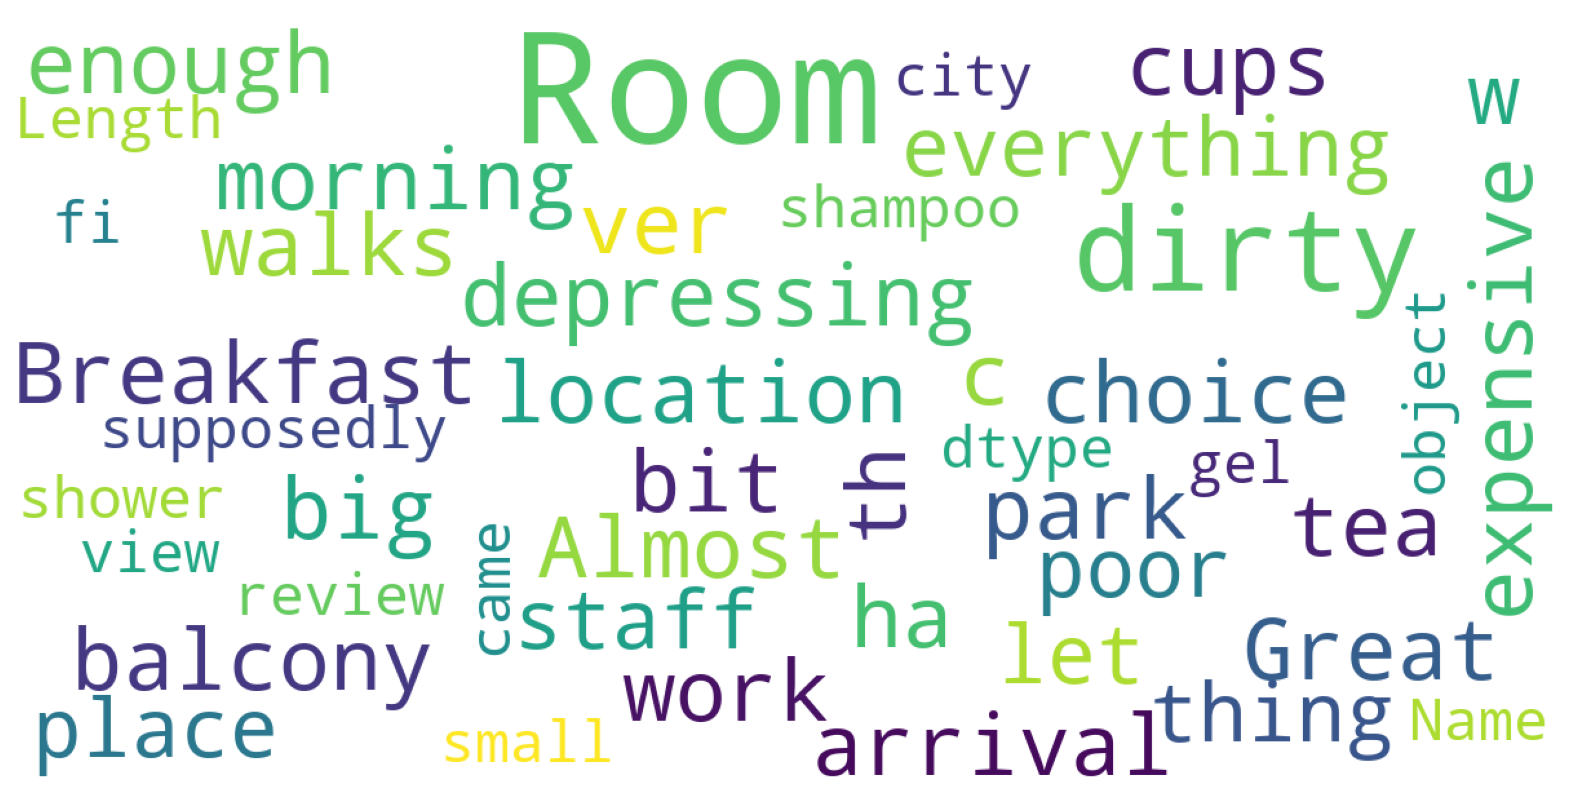

In [15]:
# использование wordcloud функции

from wordcloud import WordCloud
# Библиотека Python wordcloud используется для создания облаков слов (word clouds) — визуализаций, где размеры слов пропорциональны частоте их встречаемости в тексте.

import matplotlib.pyplot as plt
# означает импорт модуля pyplot из библиотеки matplotlib под псевдонимом plt.
# matplotlib.pyplot — это подмодуль библиотеки Matplotlib, который предоставляет простой и удобный интерфейс для создания различных графиков и визуализаций в стиле MATLAB. 
# Через plt можно вызывать функции построения графиков (line plot, bar chart, histogram, scatter plot и др.), настройки осей, заголовков, легенд, отображения и сохранения изображений.
# Использование as plt — это соглашение в сообществе Python для сокращения записи и удобства при построении графиков.

def show_wordcloud(data, title = None): # Вот пример функции show_wordcloud, которая принимает текстовые данные, генерирует облако слов и отображает его
    
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))
# означает создание объекта облака слов (WordCloud) с настройками и генерацию облака из текста, представленного в переменной data.
# Пояснение параметров:
# - background_color='white' — фон облака слов будет белым.
# - max_words=200 — максимальное количество слов, которые будут отображены в облаке (самые частотные).
# - max_font_size=40 — максимальный размер шрифта для самого часто встречающегося слова.
# - scale=3 — масштаб изображения (увеличивает разрешение визуализации, делая облако более четким).
# - random_state=42 — фиксирует случайность генерации, чтобы при повторных запусках облако выглядело одинаково (полезно для воспроизводимости).
# Метод .generate(str(data)) принимает на вход строку, из которой будет построено облако слов, подсчитывая частоту слов и распределяя их по изображению согласно параметрам.
# В итоге будет создан объект wordcloud, содержащий сгенерированное облако слов, готовое к визуализации или сохранению.
# Такая конструкция позволяет гибко настраивать вид и содержимое облака для удобного анализа текстовых данных.

    fig = plt.figure(1, figsize = (20, 20))
# означает создание нового объекта фигуры (figure) в библиотеке Matplotlib с заданным идентификатором и размером.
# Подробно:
# - plt.figure() — функция для создания новой фигуры (окна для графика или визуализации).
# - Первый аргумент 1 — уникальный номер фигуры (если фигура с таким номером уже существует, она становится активной).
# - Параметр figsize=(20, 20) задает размер фигуры в дюймах: ширина 20 и высота 20 дюймов, что достаточно большой размер для визуализации.
# Возвращаемое значение fig — объект Figure, через который можно управлять графиком, например, добавлять подграфики, настраивать оформление и отображать визуализацию.
# Этот вызов обычно выполняется в начале создания крупного или сложного графика, чтобы обеспечить пространство, подходящее для представления данных.

    plt.axis('off')
# означает отключение отображения осей на текущем графике в Matplotlib.
# Конкретно, это скрывает все элементы осей: линии осей (spines), метки делений (ticks), числовые подписи по осям и сетку. 
# Визуально это делает, что график отображается без каких-либо координатных осей, позволяя сосредоточиться только на содержимом графика или изображения.
# Это часто используют, если нужно показать, например, облако слов или изображение без отвлекающих рамок и подписей осей.
# По сути, plt.axis('off') эквивалентно вызову метода set_axis_off() у осей и устанавливает флаг невидимости декораций осей.

    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
# означает следующее:
# - if title: — проверяется, есть ли значение переменной title (если не пустое или не None).
# - fig.suptitle(title, fontsize=20) — добавляет заголовок всей фигуре (super title), т.е. общую надпись сверху над всей картинкой или набором графиков, используя текст из переменной title. 
# Размер шрифта заголовка устанавливается равным 20.
# - fig.subplots_adjust(top=2.3) — настраивает размещение подграфиков внутри фигуры, задавая верхний отступ. Значение top=2.3 перемещает верхнюю границу размещения подсюжетов ниже 
# (увеличивает отступ сверху), чтобы освободить место для заголовка и избежать его наложения на графику.
# Таким образом, этот блок добавляет заголовок к фигуре и корректирует расположение содержимого фигуры так, чтобы заголовок был хорошо виден и не перекрывал элементы графика. 
# Это важно при работе с большими или сложными фигурами с несколькими подграфиками.

    plt.imshow(wordcloud)
    plt.show()
# в библиотеке Matplotlib используется для отображения и визуализации объекта wordcloud, созданного с помощью библиотеки WordCloud.
# - plt.imshow(wordcloud) — отображает изображение облака слов, содержащегося в объекте wordcloud. Здесь imshow (image show) показывает картинку как двумерное изображение.
# - plt.show() — выводит окно с графиком или изображением для отображения пользователю. Без этого вызова изображение может не отобразиться в некоторых средах.
# Такой подход позволяет визуализировать облако слов, где размер слов соответствует их частоте в тексте, для наглядного анализа текстовых данных.
# Обычно вместе с этим часто отключают оси с помощью plt.axis('off'), чтобы на изображении не было координатных осей, что улучшает восприятие облака слов.
# Этот код эффективен, чтобы быстро и красиво показать результаты анализа текста в виде облака слов.

show_wordcloud(reviews_df["review"])
# означает вызов функции show_wordcloud, которая принимает столбец "review" из датафрейма reviews_df. Этот столбец содержит текст отзывов.
# Функция show_wordcloud (пример реализации был ранее) предназначена для генерации и отображения облака слов по переданному тексту. В данном случае она:
# - берет все отзывы из столбца "review",
# - преобразует их в один большой текст,
# - создает визуализацию частотности слов в виде облака слов,
# - отображает облако слов на графике.
# Это удобный способ быстро увидеть наиболее часто встречающиеся слова в отзывах, выделить важные темы или настроения, а также проанализировать тексты визуально.
# Обычно перед вызовом такой функции происходит объединение текстов в один, очистка от лишних символов или стоп-слов, а затем передача результата в генератор облака слов

In [16]:
# Топ позитивных отзывов (содержит > 5 слов)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)
# означает выполнение следующих операций с DataFrame reviews_df:
# - reviews_df["nb_words"] >= 5 — фильтрация строк, где значение в столбце "nb_words" (например, количество слов в отзыве) не меньше 5. Оставляет только такие строки.
# - sort_values("pos", ascending=False) — сортировка отфильтрованных строк по столбцу "pos" в порядке убывания (например, оценки или позитива).
# - [["review", "pos"]] — выборка только столбцов "review" (текст отзыва) и "pos" (оценка).
# - head(10) — взятие первых 10 строк из полученного результата.
# Итог: этот код показывает 10 отзывов с количеством слов в отзыве не меньше 5, отсортированных по убыванию значения в столбце "pos", выводя только текст отзыва и оценку.
# Это полезно для анализа и просмотра самых "позитивных" или "качественных" отзывов с достаточной длиной текста. Такой подход часто применяется для фильтрации и ранжирования данных в pandas.

,review,pos
141924,Clean helpful efficient,1.000
509325,Clean comfortable efficient,1.000
245292,Nice clean comfortable,1.000
333927,Great clean comfortable Great concierge,0.934
411351,Excellent service super comfortable,0.916
368656,Clean friendly lovely rooms,0.907
488108,Great staff helpful smiley,0.906
868,Friendly welcome Comfortable room,0.905
221411,Comfortable clean and friendly,0.902
53608,Smile More friendly I hope,0.902


In [17]:
# Топ негативных отзывов (содержит > 5 слов)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
74453,All No no no,0.868
276567,Uncomfortable bed noisy,0.811
32377,A disaster Nothing,0.804
283853,Noisy no view,0.796
38524,Very bad service No,0.758
461033,Nothing Perfect,0.750
309172,Nothing Excellent,0.750
419280,Nothing Great friendly staff,0.748
66684,Nothing Loved it thanks,0.735
263821,Nothing Welcoming happy staff,0.730


In [18]:
reviews_df.head()

,review,is_bad_review,reviewer_score,sample,review_clean,neg,neu,pos,compound,nb_chars,...,word_yet,word_yoghurt,word_yogurt,word_young,word_yummy,word_zero,word_ziggo,word_zone,word_zoo,word_zuid
488440,The tea cups were dirty on arrival We also ha...,0,7.1,1,tea cup dirty arrival also connect door anothe...,0.018,0.663,0.318,0.9868,418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,Not a big enough choice,0,6.7,1,big enough choice,0.000,1.000,0.000,0.0000,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374688,Room was a bit dirty the a c did not work ver...,0,5.4,1,room bit dirty work well staff courteous frien...,0.233,0.507,0.260,0.4199,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404352,Great location for morning walks in the park ...,0,10.0,1,great location morning walk park also shop aro...,0.000,0.695,0.305,0.9081,171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451596,The balcony in the room was very depressing w...,0,7.5,1,balcony room depress view table chair outside ...,0.063,0.783,0.153,0.9016,631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Предсказание reviewer_score

In [19]:
# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# означает следующее:
# - import matplotlib.pyplot as plt — импорт подмодуля pyplot библиотеки Matplotlib с псевдонимом plt. Этот модуль используется для создания графиков и визуализаций.
# - import seaborn as sns — импорт библиотеки Seaborn с псевдонимом sns. Seaborn строится поверх Matplotlib и предоставляет более удобные и эстетичные средства для статистической визуализации.
# - %matplotlib inline — это "магическая" команда IPython/Jupyter Notebook, которая заставляет встроенный рендеринг Matplotlib отображать графики непосредственно в ячейках ноутбука (внутри браузера), 
# а не в отдельном окне. Это удобно для интерактивного анализа данных и визуализации.
# Вместе эти строки обычно встречаются в начале ячейки ноутбука для подготовки среды визуализации и удобной работы с графиками в рамках анализа данных и научных исследований на Python.

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split
# означает импорт функции train_test_split из модуля model_selection библиотеки Scikit-learn (sklearn).
# Функция train_test_split используется для случайного разделения наборов данных на подмножества для обучения (train) и тестирования (test).
# Это стандартный шаг при построении моделей машинного обучения, чтобы оценить качество модели на "новых" данных.
# Основные особенности:
# Принимает на вход данные (X — признаки, y — целевая переменная).
# Позволяет задать долю тестового набора через параметр test_size (например, 0.2 — 20% данных уходит на тест).
# Имеет параметр random_state для воспроизводимости разбиения.
# Возвращает 4 объекта: обучающие данные и метки, тестовые данные и метки.

# Всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42
# означает установку значения для фиксированного "сема" (seed) генератора случайных чисел.
# В контексте машинного обучения и библиотек, например Scikit-learn, параметр random_state (часто равный числу 42) задает начальное состояние генератора псевдослучайных чисел. 
# Это нужно для воспроизводимости экспериментов — чтобы при повторных запусках кода с одинаковыми данными и параметрами получать одинаковые результаты.
# Число 42 часто используется как стандартное фиксированное значение (вино из "Автостопщика по Галактике"), но можно использовать любое целое число. 
# Основная задача — сделать процесс обучения, разбиения данных и другие операции, зависящие от случайности, детерминированными.
# Таким образом, RANDOM_SEED = 42 служит для контроля случайности и воспроизводимости моделей и экспериментов в машинном обучении.

In [20]:
# Теперь выделим тестовую часть

train_data = reviews_df.query('sample == 1').drop(['sample'], axis=1)
test_data = reviews_df.query('sample == 0').drop(['sample'], axis=1)
# делает следующее:
# - reviews_df.query('sample == 1') — выбирает из датафрейма reviews_df те строки, у которых значение в столбце sample равно 1. Это создаёт подмножество данных, например, для обучения.
# - drop(['sample'], axis=1) — удаляет из полученного подмножества столбец sample. Здесь параметр axis=1 означает удаление колонок (в данном случае одной колонки sample), а не строк.
# - Аналогично, reviews_df.query('sample == 0') выбирает строки, где sample равен 0 (например, для теста) и тоже удаляет столбец sample.
# В итоге переменные train_data и test_data содержат соответственно тренировочный и тестовый поднаборы данных без столбца sample, на основе которого они были отфильтрованы.
# Такой способ фильтрации и очистки данных часто используют для разделения датасета на обучающую и тестовую выборки, при этом удаляя служебный столбец, чтобы он не мешал обучению модели.
# Параметр axis=1 в функции drop() указывает, что удаляется колонка, а не строка.Код

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score','review','review_clean'], axis=1)
# означает подготовку данных для обучения модели машинного обучения:
# - y = train_data.reviewer_score.values — создание массива значений целевой переменной (таргета), здесь это оценки reviewer_score. Этот массив будет использоваться как целевые метки для обучения модели.
# - X = train_data.drop(['reviewer_score', 'review', 'review_clean'], axis=1) — создание нового датафрейма признаков (фичей) X за счет удаления из train_data столбцов:
# - reviewer_score (целевая переменная),
# - review (текст отзывов),
# - review_clean (очищенный текст, вероятно).
# Оставшиеся столбцы представляют собой признаки, по которым модель будет учиться предсказывать оценки.
# Таким образом, строка разделяет исходные данные на:
# - X — набор признаков (фич),
# - y — целевую переменную для обучения.
# Это стандартный шаг подготовки данных в машинном обучении при использовании pandas и scikit-learn.

# X = X[['is_bad_review','pos','neg','compound','doc2vec_vector_0','doc2vec_vector_1','doc2vec_vector_2','doc2vec_vector_3','doc2vec_vector_4','word_room',
#       'word_small','nb_chars','word_nothing','word_good','neu','nb_words','word_location','word_everthing','word_staff','word_breakfast']]
# X.head()

In [21]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
# означает разбиение данных на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.
# - X — входные признаки (features),
# - y — целевая переменная (label),
# - test_size=0.2 — 20% данных выделяется для теста, остальные 80% — для обучения,
# - random_state=RANDOM_SEED — фиксирует сид генератора случайных чисел для воспроизводимости разбиения.
# Функция случайным образом перемешивает данные и разбивает их на четыре массива:
# - X_train — обучающие признаки,
# - X_test — тестовые признаки,
# - y_train — обучающие метки,
# - y_test — тестовые метки.
# Это стандартный шаг подготовки данных для обучения и оценки моделей машинного обучения, позволяющий проверить качество модели на неизученных данных.
# Таким образом, после выполнения этой строки модель можно обучать на X_train, y_train и оценивать качество на X_test, y_test.

In [22]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape
# возвращает кортеж из размеров (форм) пяти различных DataFrame или массивов numpy.
# Атрибут .shape в pandas DataFrame и numpy массиве — это кортеж, который показывает:
# - число строк (наблюдений, записей) — первый элемент,
# - число столбцов (признаков, колонок) — второй элемент.
# Для вашего кода возвращаются:
# - размер test_data (число строк и столбцов),
# - размер train_data,
# - размер X (признаков для обучения),
# - размер X_train (признаков обучающей выборки),
# - размер X_test (признаков тестовой выборки).
# Это удобно для проверки размеров всех ключевых частей данных на каждом шаге подготовки и разбиения, чтобы убедиться, что они корректны и соответствуют ожиданиям.
# Например, X_train.shape может вернуть (800, 10), что означает 800 строк и 10 признаков в обучающей выборке.
# Аналогично другие .shape помогают понять структуру и размер каждого поднабора данных.

((12821, 3860), (38753, 3860), (38753, 3857), (31002, 3857), (7751, 3857))

In [23]:
# Импортируем необходимые библиотеки:

from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
# означает импорт класса RandomForestRegressor из модуля ensemble библиотеки scikit-learn.
# RandomForestRegressor — это регрессионная модель, основанная на ансамбле решающих деревьев (random forest). В модели обучается множество деревьев на случайных подвыборках данных, 
# а итоговый прогноз получается усреднением результатов всех деревьев. Такой подход повышает стабильность и точность модели, снижая переобучение.
# Основные особенности RandomForestRegressor:
# - Может использоваться для предсказания непрерывных числовых значений.
# - Позволяет легко настраивать параметры: количество деревьев (n_estimators), глубину деревьев (max_depth), критерии разбиения, параметры регуляризации и др.
# - Хорошо работает на разнообразных задачах регрессии с меньшей необходимостью тщательной настройки по сравнению с одиночным деревом.
    
from sklearn import metrics # инструменты для оценки точности модели
# означает импорт модуля metrics из библиотеки scikit-learn.
# Модуль metrics содержит множество функций и утилит для оценки качества моделей машинного обучения, включая методы для регрессии и классификации.
# Для задач регрессии в metrics есть такие популярные метрики, как:
# Средняя абсолютная ошибка (MAE, Mean Absolute Error),
# Среднеквадратичная ошибка (MSE, Mean Squared Error),
# Корень из среднеквадратичной ошибки (RMSE),
# Коэффициент детерминации (R² score),
# Пояснённая дисперсия (Explained Variance Score),
# и другие.
# С помощью этого модуля можно измерить, насколько точно модель предсказывает целевую переменную, сравнивая предсказания и истинные значения.

In [24]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
# создаёт объект модели случайного леса для регрессии с такими параметрами:
# - n_estimators=100 — количество деревьев в лесу. Чем больше деревьев, тем стабильнее и точнее модель, но рост времени обучения. Значение 100 — типичное разумное число.
# - verbose=1 — уровень вывода сообщений о процессе обучения. 1 означает вывод информации о ходе обучения.
# - n_jobs=-1 — число процессов для параллельного обучения. Значение -1 означает использовать все доступные ядра процессора для ускорения обучения.
# - random_state=RANDOM_SEED — фиксирует начальное состояние генератора случайных чисел для воспроизводимости результатов.
# Этот набор параметров обеспечивает баланс между скоростью обучения, удобством отладки (вывод прогресса) и стабильностью модели за счет фиксированного сидирования.
# Такой вызов часто используется в реальных проектах для создания и обучения регрессионной модели на основе случайного леса с контролем случайности и максимальным распараллеливанием.Строка

In [25]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)
# означает обучение модели RandomForestRegressor на обучающих данных.
# Метод fit принимает на вход:
# X_train — матрицу признаков обучающей выборки (объекты и их характеристики),
# y_train — массив целевых значений (таргетов) для этих объектов.
# В процессе вызова fit модель строит множество деревьев решений на случайных подвыборках обучающих данных и усредняет их результаты, чтобы обучиться предсказывать целевую переменную.
# После выполнения этого метода модель обучена и готова делать прогнозы, для которых используется метод predict.
# fit — ключевой метод для любого алгоритма машинного обучения в scikit-learn, отвечающий за "запоминание" закономерностей из тренировочных данных.
# Таким образом, эта строка запускает процесс обучения случайного леса на тренировочном наборе X_train и y_train.

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)
# означает выполнение предсказания целевой переменной на тестовом наборе данных с помощью обученной модели RandomForestRegressor.
# Метод predict:
# - Принимает на вход набор признаков для тестовых данных X_test.
# - Пропускает эти данные через все деревья случайного леса модели.
# - Возвращает массив предсказанных значений y_pred — прогноз модели для каждого объекта из X_test.
# Этот шаг используется после обучения модели для оценки её качества на ранее не виденных данных, чтобы понять насколько точно модель предсказывает целевую переменную.
# Результат y_pred затем может использоваться с метриками качества из sklearn.metrics для анализа производительности модели.
# Таким образом, predict превращает входные признаки тестового набора в прогнозируемые значения с помощью модели случайного леса.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [26]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# выводит на экран значение метрики Mean Absolute Error (MAE) — среднюю абсолютную ошибку модели.
# Что происходит:
# metrics.mean_absolute_error(y_test, y_pred) — вычисляет среднее абсолютное отклонение между истинными значениями y_test и предсказаниями y_pred.
# MAE показывает среднее по всем объектам величину ошибки без учёта знака — насколько в среднем прогнозы отличаются от реальных значений.
# Чем ниже MAE, тем точнее модель.
# Формально, MAE считается по формуле:
# Это одна из ключевых метрик для оценки регрессионных моделей, которая легко интерпретируется.

MAE: 0.8086670123977855


<Axes: >

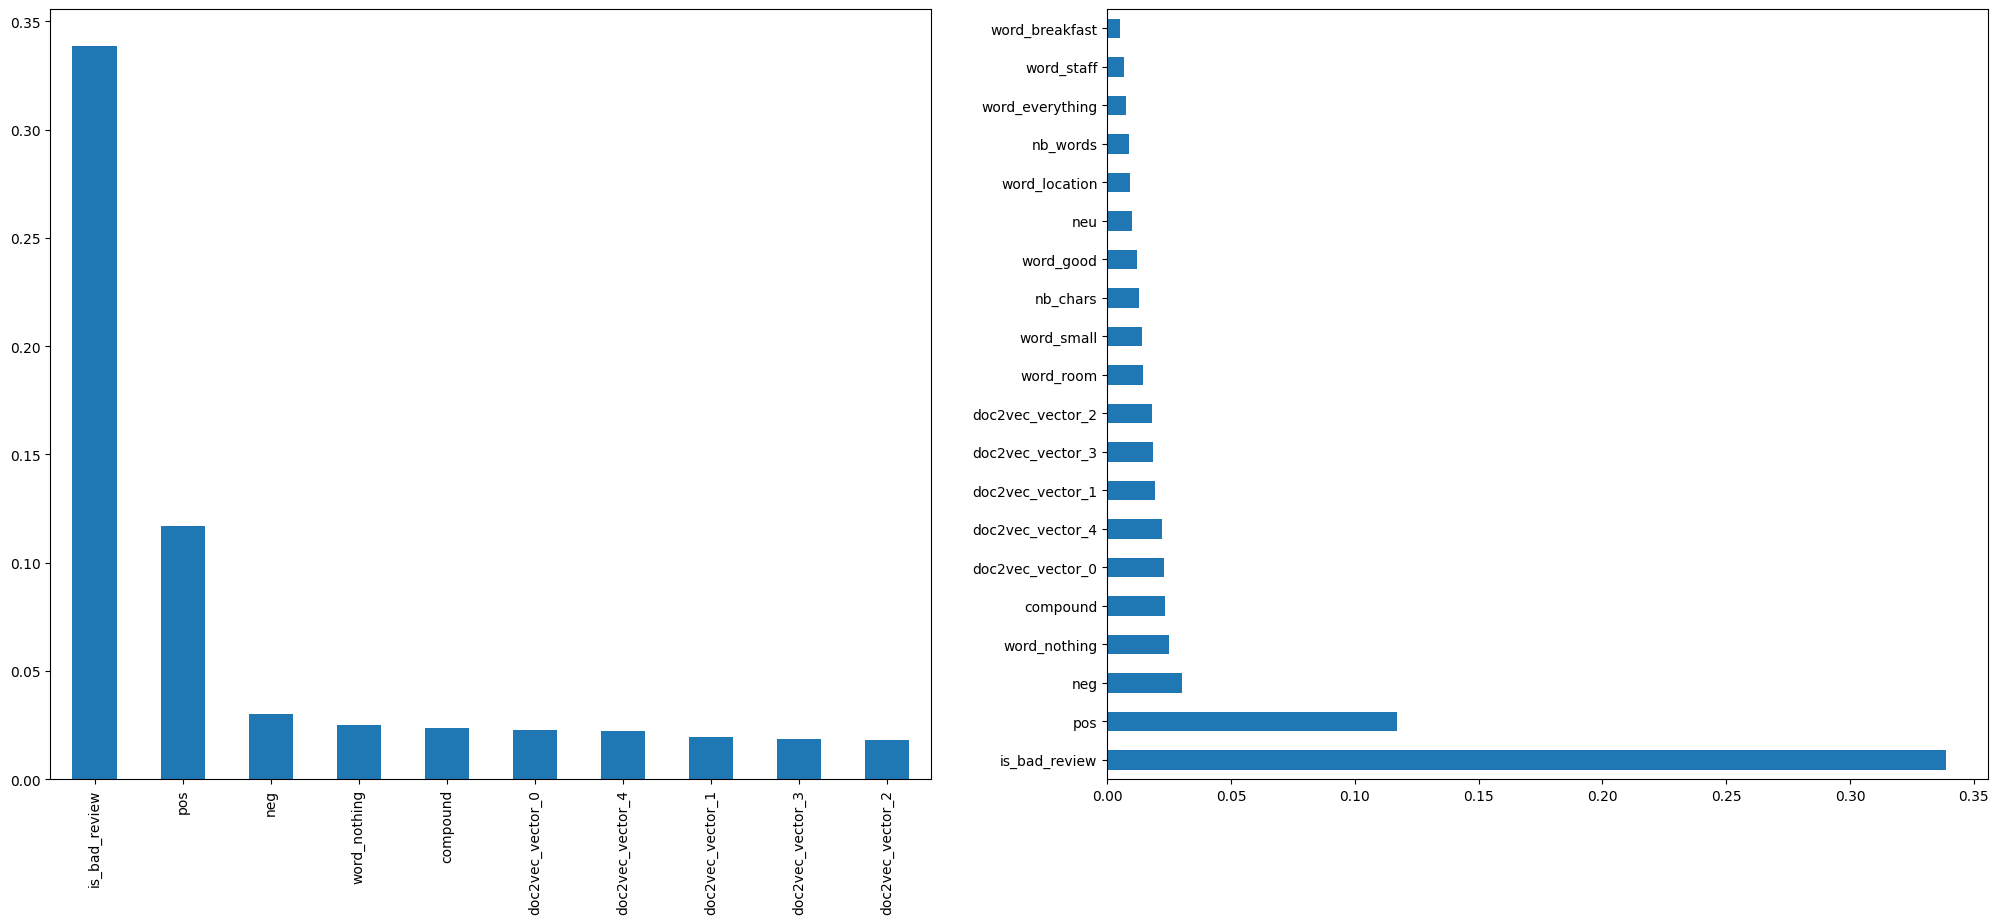

In [27]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (25,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# делает следующее:
# - plt.rcParams['figure.figsize'] = (25, 10) — устанавливает глобальный размер фигуры для всех графиков, создаваемых с помощью matplotlib. 
# Здесь размер задается в дюймах: ширина 25 дюймов и высота 10 дюймов. Такой большой размер удобен для крупных визуализаций, чтобы графики были четкими и читаемыми.
# - feat_importances = pd.Series(model.feature_importances_, index=X.columns) — создаёт pandas Series с важностью признаков (features importance), 
# выведенной из обученной модели случайного леса model.feature_importances_. Индексом в Series служат названия признаков из X.columns. Это позволяет легко анализировать, 
# насколько каждый признак важен для предсказаний модели.
# Таким образом, эта часть кода подготавливает визуальные настройки для графиков и создаёт удобную структуру данных для анализа значимости признаков модели.Код

plt.subplot(1, 2, 2)
# в библиотеке Matplotlib задаёт текущий активный подграфик (subplot) в фигуре, где:
# 1 — количество строк в сетке подграфиков (здесь 1 строка),
# 2 — количество столбцов в сетке подграфиков (здесь 2 столбца),
# 2 — индекс текущего подграфика (нумерация слева направо, сверху вниз).
# То есть эта команда выбирает второй подграфик в сетке из одной строки и двух столбцов, чтобы на нём потом строить графики.
# Это позволяет создавать несколько графиков в одном окне и управлять расположением каждого.
# Например, если перед этим вызвана команда plt.subplot(1, 2, 1), то первый подграфик становится активным, а затем plt.subplot(1, 2, 2) переключает активность на второй подграфик.
# Далее команды построения графиков (например, plt.plot()) будут относиться к выбранному подграфику.

feat_importances.nlargest(20).plot(kind='barh')
# делает следующее:
# - feat_importances.nlargest(20) — выбирает из серии feat_importances (важности признаков модели) 20 самых больших значений. Это означает топ-20 наиболее значимых признаков по важности для модели.
# - .plot(kind='barh') — строит горизонтальную (barh) столбчатую диаграмму, визуализирующую выбранные 20 самых важных признаков.
# Это позволяет наглядно увидеть, какие признаки больше всего влияют на результат модели, и сравнить их значимость.
# Горизонтальный бар-чарт удобен для удобства чтения длинных названий признаков.
# Такой подход часто используется для интерпретации моделей случайного леса и других алгоритмов, которые предоставляют значения важности признаков.

plt.subplot(1, 2, 1)
feat_importances.nlargest(10).plot(kind='bar')
# делает следующее:
# - plt.subplot(1, 2, 1) выбирает первый подграфик из сетки, состоящей из 1 строки и 2 столбцов. Этот подграфик станет активным и на нём будет строиться график.
# - feat_importances.nlargest(10) выбирает 10 признаков с наибольшей важностью из серии feat_importances.
# - .plot(kind='bar') строит вертикальную столбчатую диаграмму этих 10 признаков по убыванию важности.
# В результате будет показан столбчатый график топ-10 самых важных признаков модели на первом подграфике фигуры с двумя подграфиками.
# Этот подход позволяет удобно сравнить визуализацию с другим графиком, например, расположенным во втором подграфике.
# Такое построение часто используется для наглядного анализа важности признаков в машинном обучении с библиотекой matplotlib

In [28]:
# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# вычисляет метрику Mean Absolute Percentage Error (MAPE) — среднюю абсолютную процентную ошибку между истинными значениями y_true и предсказаниями y_pred.
# Описание:
# - Значения y_true и y_pred преобразуются в numpy массивы для удобства вычислений.
# - Для каждой пары значений считается абсолютное относительное отклонение: 
# - Все такие отклонения усредняются функцией np.mean.
# - Результат умножается на 100, чтобы получить процент.
# Формула MAPE:
# MAPE показывает среднемасштабную ошибку предсказаний в процентах, что удобно для интерпретации и сравнения моделей.
# Важно: MAPE чувствителен к значениям yi близким к нулю, так как деление на очень малые числа может приводить к большим значениям ошибки.
# Эта метрика широко используется в задачах регрессии и прогнозирования для оценки качества модели.

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred.round(1)))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred.round(1)))
# выводит на экран две метрики качества модели:
# - MAE (Mean Absolute Error) — средняя абсолютная ошибка между истинными значениями y_test и предсказаниями y_pred.round(1). Здесь round(1) округляет предсказания до 1 десятичного знака 
# для более стабильного сравнения. MAE показывает среднее абсолютное отклонение в тех же единицах измерения, что и целевая переменная.
# - MAPE (Mean Absolute Percentage Error) — средняя абсолютная процентная ошибка, вычисляемая функцией mean_absolute_percentage_error, также на основе округленных предсказаний. 
# MAPE показывает ошибку в процентах от истинных значений, позволяя оценить относительную точность модели.
# Отличие:
# - MAE измеряет абсолютную ошибку без учёта масштаба значений,
# - MAPE выражает ошибку в процентах, что удобно для сравнения качества на разных масштабах.
# Использование обеих метрик помогает получить полное представление о производительности модели: MAE даёт конкретную ошибку в исходных единицах, а MAPE — как сильно 
# в среднем ошибается модель относительно реальных значений.
# Такой подход полезен для интерпретации и оценки регрессионных моделей.

MAE: 0.8084376209521352
MAPE: 10.774414850772082
